#Importar librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances, silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import rbf_kernel

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx
from sklearn.manifold import TSNE
import seaborn as sns

# Descarga de Datos

In [2]:
#data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv', delimiter=';')
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_only_avgcolumns.csv', delimiter=';')
#data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_without_avgcolumns.csv', delimiter=';')

# Preprocesado de Datos

In [3]:
#Preprocesado de datos ya que Spectral Clustering requiere datos numéricos para calcular la matriz de afinidad y realizar el clustering

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = data.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [4]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = data.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

# Crear matriz de características (feature matrix)

In [5]:
# Crear una matriz de características (feature matrix) a partir de los datos:
X = data_processed.values

# Aplicar el algoritmo de clustering espectral

# A) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando la DISTANCIA EUCLIDEANA

# B) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando RBF

In [6]:
#utilizar la función pairwise_distances de scikit-learn para calcular la matriz de afinidad utilizando la distancia euclidiana entre las muestras en X
affinity_matrix_euclidean = pairwise_distances(X, metric='euclidean')

affinity_matrix_rbf = rbf_kernel(X, gamma=0.1)  #se recomienda probar diferentes valores de gamma en un rango amplio, como [0.001, 0.01, 0.1, 1, 10]


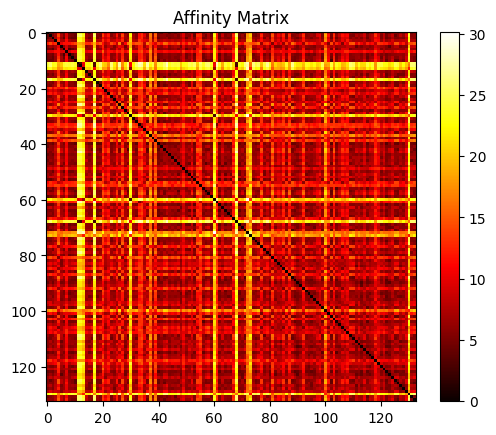

In [7]:
#Visualización de matriz de similitud
#Esto puede proporcionar información sobre las relaciones de similitud entre las muestras
plt.imshow(affinity_matrix_euclidean, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Affinity Matrix')
plt.show()

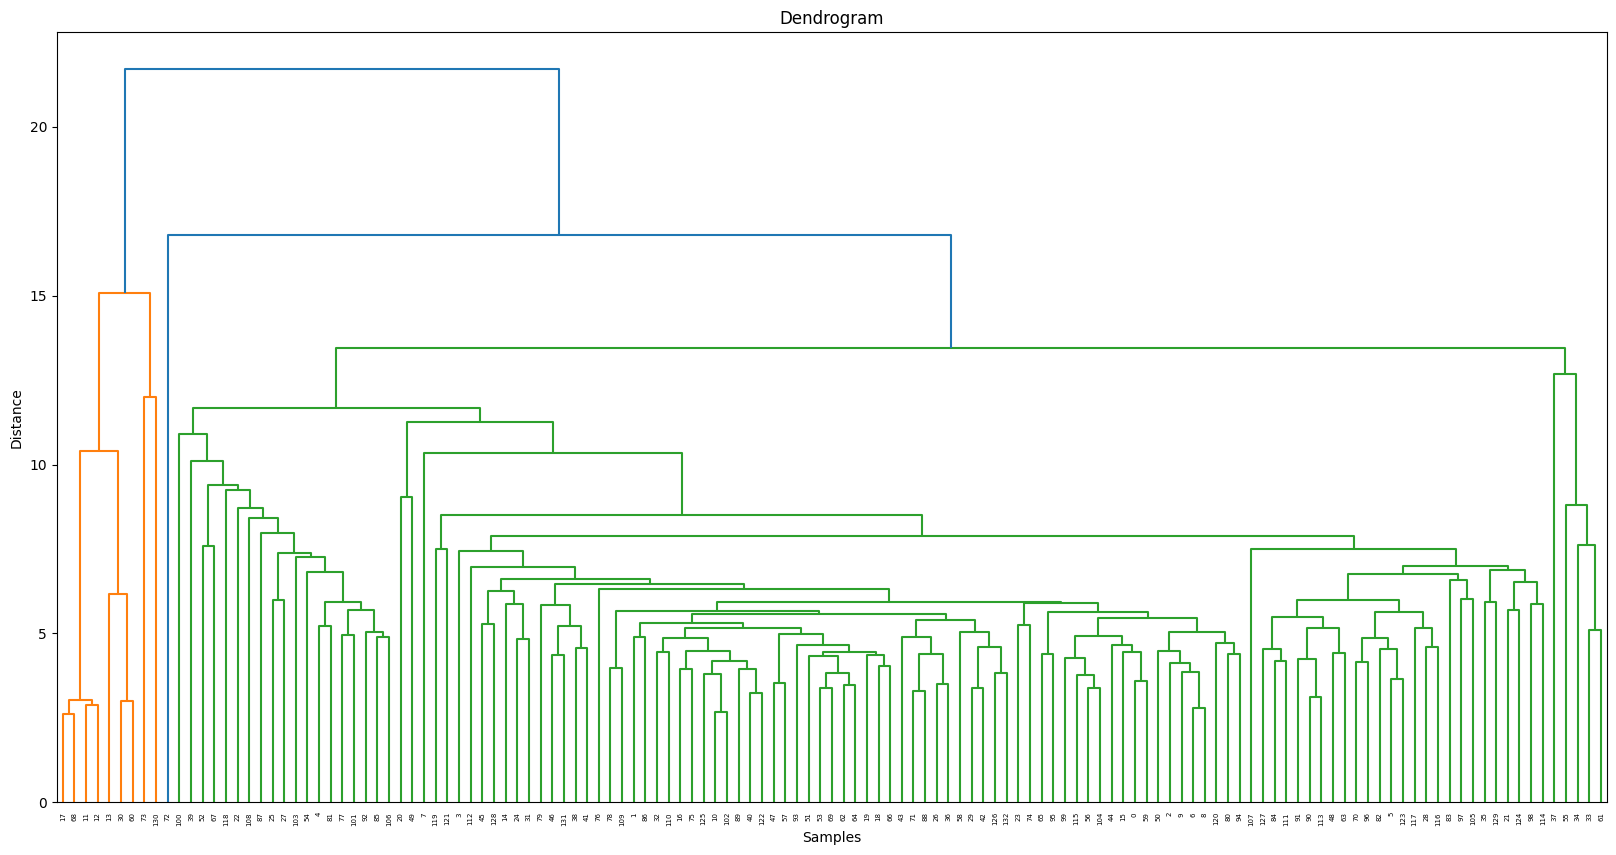

In [8]:
#Visualización de gráfico de dendrograma

# Calcular la matriz de enlace jerárquico
Z = linkage(X, method='average', metric='euclidean')

# Dibujar el dendrograma
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [9]:
affinity_matrixes = ['affinity_matrix_euclidean','affinity_matrix_rbf']
assign_labels = ['discretize', 'kmeans']
resultados = []

for assign_label in assign_labels:
  for affinity_matrix in affinity_matrixes:
    for n_clusters in range(4,98):
      spectral_clustering1 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels=assign_label, random_state=42)
      # se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
      if affinity_matrix=='affinity_matrix_euclidean':
        etiquetas = spectral_clustering1.fit_predict(affinity_matrix_euclidean)
      else:
        etiquetas = spectral_clustering1.fit_predict(affinity_matrix_rbf)

      # Calcular el índice de silueta
      silhouette_avg = silhouette_score(data_processed, etiquetas)

      resultados.append({"Affinity_matrix":affinity_matrix,"Assign_label":assign_label,"Affinity":'precomputed',"N_clusters":n_clusters,"Silhouette_medio":silhouette_avg})
      print(f"Affinity_matrix:{affinity_matrix},Assign_label:{assign_label}, Affinity:'precomputed', N_clusters:{n_clusters} - Índice de Silhouette Promedio: {silhouette_avg}")



Affinity_matrix:affinity_matrix_euclidean,Assign_label:discretize, Affinity:'precomputed', N_clusters:4 - Índice de Silhouette Promedio: 0.5026310659487421
Affinity_matrix:affinity_matrix_euclidean,Assign_label:discretize, Affinity:'precomputed', N_clusters:5 - Índice de Silhouette Promedio: 0.5179927987522603
Affinity_matrix:affinity_matrix_euclidean,Assign_label:discretize, Affinity:'precomputed', N_clusters:6 - Índice de Silhouette Promedio: -0.07472347104295136
Affinity_matrix:affinity_matrix_euclidean,Assign_label:discretize, Affinity:'precomputed', N_clusters:7 - Índice de Silhouette Promedio: -0.12909952433833916
Affinity_matrix:affinity_matrix_euclidean,Assign_label:discretize, Affinity:'precomputed', N_clusters:8 - Índice de Silhouette Promedio: -0.12851192915074447
Affinity_matrix:affinity_matrix_euclidean,Assign_label:discretize, Affinity:'precomputed', N_clusters:9 - Índice de Silhouette Promedio: -0.13799311053753216
Affinity_matrix:affinity_matrix_euclidean,Assign_label:d

In [10]:
df_resultados=pd.DataFrame(resultados)
print(df_resultados)

               Affinity_matrix Assign_label     Affinity  N_clusters  \
0    affinity_matrix_euclidean   discretize  precomputed           4   
1    affinity_matrix_euclidean   discretize  precomputed           5   
2    affinity_matrix_euclidean   discretize  precomputed           6   
3    affinity_matrix_euclidean   discretize  precomputed           7   
4    affinity_matrix_euclidean   discretize  precomputed           8   
..                         ...          ...          ...         ...   
371        affinity_matrix_rbf       kmeans  precomputed          93   
372        affinity_matrix_rbf       kmeans  precomputed          94   
373        affinity_matrix_rbf       kmeans  precomputed          95   
374        affinity_matrix_rbf       kmeans  precomputed          96   
375        affinity_matrix_rbf       kmeans  precomputed          97   

     Silhouette_medio  
0            0.502631  
1            0.517993  
2           -0.074723  
3           -0.129100  
4           -0.

In [12]:
df_resultados.to_csv("resultados_comparacion_spectralclustering_Only_avgcolumns.csv",sep=";",index=False)

**ESTI: HONEAINO BUKLEARENA. NIK MARRAZTU BESTE EZBERDIN BATEN EGITEN DET HEMENDIK DATUAK ATERA ONDOREN**

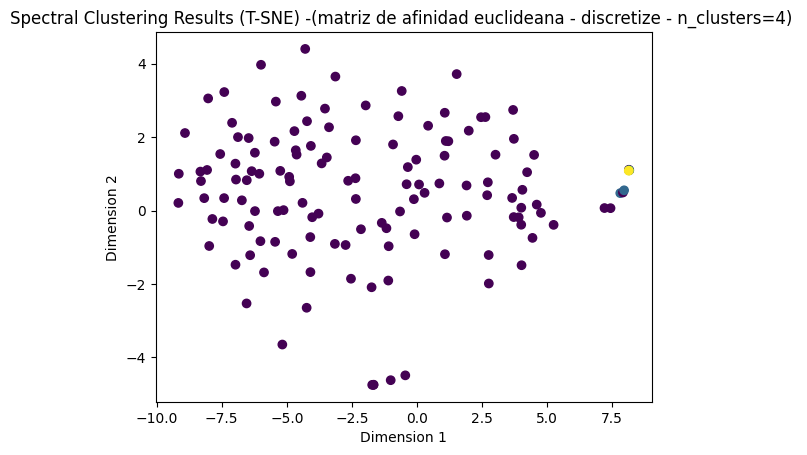

In [ ]:
#T-SNE (t-Distributed Stochastic Neighbor Embedding)

# Reducción de dimensionalidad con T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualización en un gráfico de dispersión
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Spectral Clustering Results (T-SNE) -(matriz de afinidad euclideana - discretize - n_clusters=4) ')
plt.show()


# Gráfico radar
   * Si tus datos tienen características numéricas, puedes utilizar un gráfico de radar para visualizar las características promedio de cada clúster.
   * Cada clúster se representa como un polígono y la posición de los vértices del polígono corresponde a los valores promedio de las características en ese clúster.

## Gráfico radar: matriz de afinidad euclideana - discretize - n_clusters=4

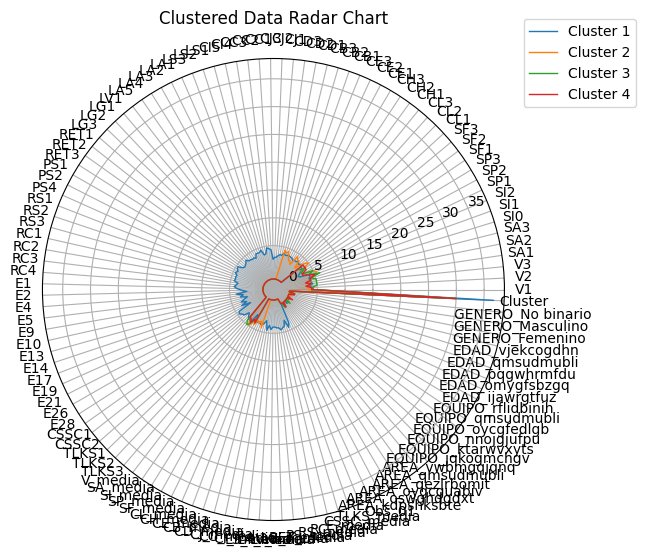

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels1).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()


## Gráfico radar:  matriz de afinidad euclideana - kmeans - n_clusters=4

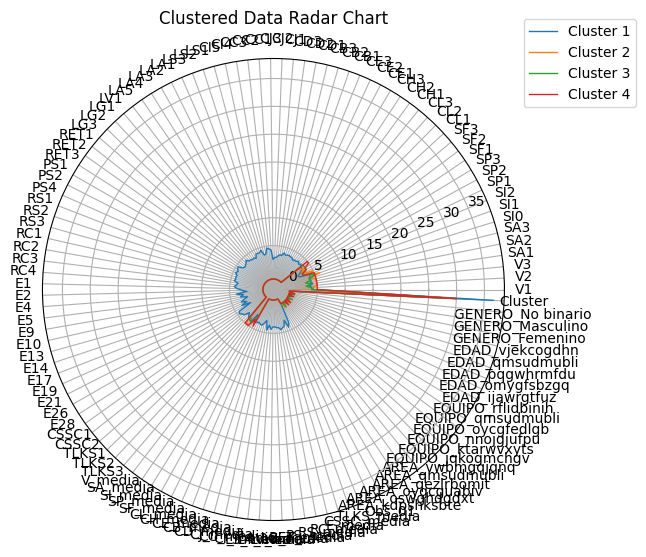

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels4).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()

## Gráfico radar: matriz de afinidad RBF - kmeans - n_clusters=27

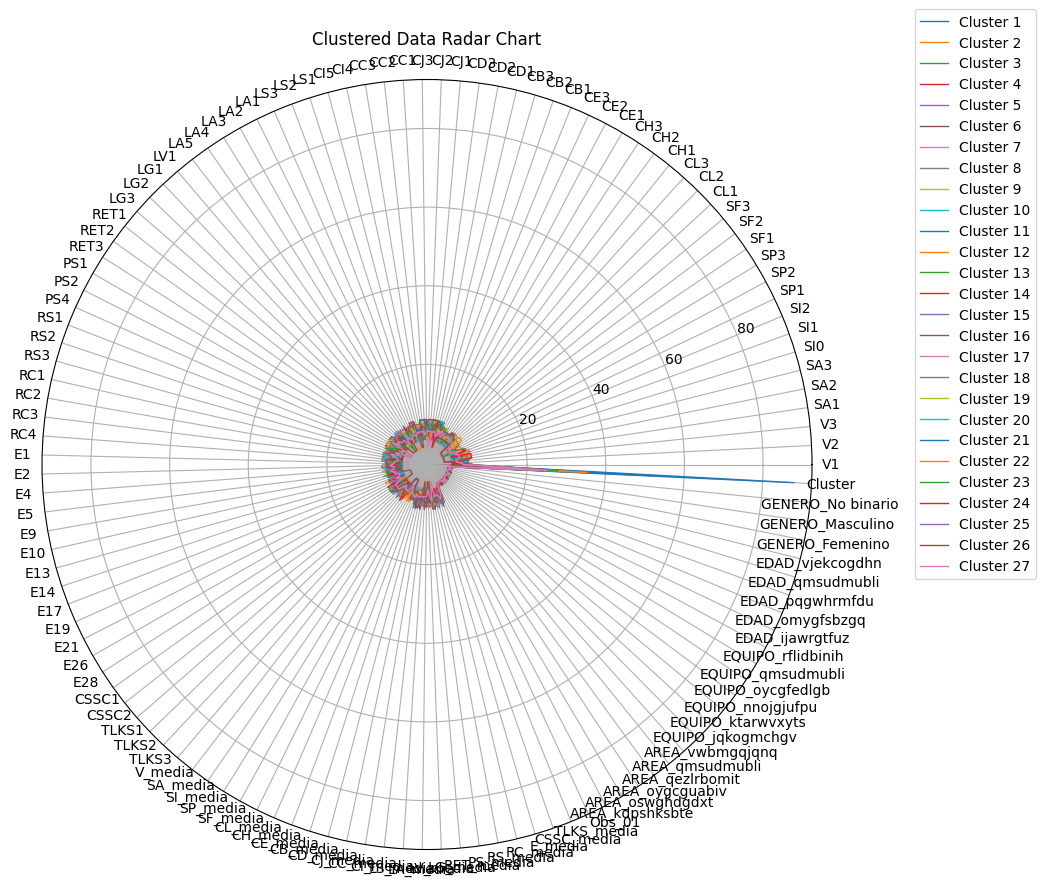

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labelsRBF_12).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()